# Neural Network from scratch without using Pytorch,Tensorflow or Keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the input data

In [ ]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [ ]:
# Loading the dataset
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)


data_train=data.T
Y_train=data_train[0]
X_train=data_train[1:]
# Dividing by 255 so that the pixels would contain values in the range 0 to 1
X_train=X_train/255
Y_train=Y_train/255

In [ ]:
# We take 784 inputs in input layer, 10 nuerons in hidden layer 1 and 10 neurons in output layer
def init_params():
    W1=np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1=np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2=np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2=np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1,b1,W2,b2

In [ ]:
# Activation function
def ReLU(x):
    return np.maximum(0,x)

In [ ]:
# Activation function
def Softmax(Z):
    Z-=np.max(Z, axis=0)  # Subtract max value for numerical stability
    A=np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

In [ ]:
# Function for forward propagation with inputs as weights and biases for hidden layer 1 and output layer
def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=Softmax(Z2)
    return Z1,A1,Z2,A2

In [ ]:
# Derivative of the activation function. We will need while back-propagating
def ReLU_derivative(x):
    return x>0

In [ ]:
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

In [ ]:
def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1)
    return dW1,db1,dW2,db2

In [ ]:
# let alpha be the learning rate
# updating the weights

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(prediction,x):
    print(prediction,x)
    return (np.sum(prediction==x)/x.size)

In [ ]:
def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%10==0:
            print("Iteration: ",i)
            predictions=get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1,b1,W2,b2

In [ ]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,0.10,500)

Iteration:  0
[5 5 1 ... 3 5 5] [9 0 3 ... 1 4 6]
0.10680487804878049
Iteration:  10
[5 3 2 ... 3 2 6] [9 0 3 ... 1 4 6]
0.18795121951219512
Iteration:  20
[5 3 2 ... 2 9 6] [9 0 3 ... 1 4 6]
0.3805121951219512
Iteration:  30
[5 3 3 ... 1 9 6] [9 0 3 ... 1 4 6]
0.5393902439024391
Iteration:  40
[5 3 3 ... 1 9 6] [9 0 3 ... 1 4 6]
0.6369756097560976
Iteration:  50
[5 3 3 ... 1 9 6] [9 0 3 ... 1 4 6]
0.6933658536585365
Iteration:  60
[5 3 3 ... 1 9 6] [9 0 3 ... 1 4 6]
0.7404146341463415
Iteration:  70
[9 3 3 ... 1 9 6] [9 0 3 ... 1 4 6]
0.7739024390243903
Iteration:  80
[9 3 3 ... 1 6 6] [9 0 3 ... 1 4 6]
0.7953658536585366
Iteration:  90
[9 3 3 ... 1 6 6] [9 0 3 ... 1 4 6]
0.8108536585365854
Iteration:  100
[9 3 3 ... 1 6 6] [9 0 3 ... 1 4 6]
0.8225853658536585
Iteration:  110
[9 3 3 ... 1 4 6] [9 0 3 ... 1 4 6]
0.8324634146341463
Iteration:  120
[9 3 3 ... 1 4 6] [9 0 3 ... 1 4 6]
0.8413414634146341
Iteration:  130
[9 3 3 ... 1 4 6] [9 0 3 ... 1 4 6]
0.8483414634146341
Iteration:  140

In [ ]:
def make_predictions(X,W1,b1,W2,b2):
    A,B,C,A2=forward_prop(W1,b1,W2,b2,X)
    predictions=get_predictions(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    current_image=X_train[:,index,None]
    prediction=make_predictions(X_train[:, index, None],W1,b1,W2,b2)
    label=Y_train[index]
    print("Prediction: ",prediction)
    print("Label: ", label)


    #Again reconverting the image in the form of 28*28 grid
    current_image=current_image.reshape((28, 28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


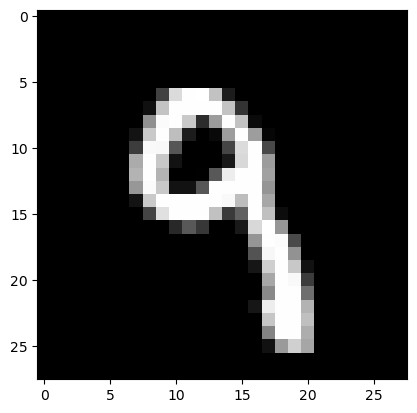

Prediction:  [7]
Label:  7


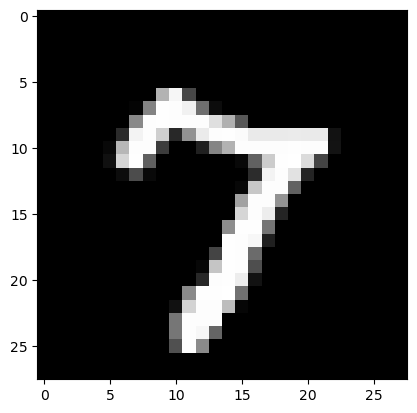

Prediction:  [0]
Label:  0


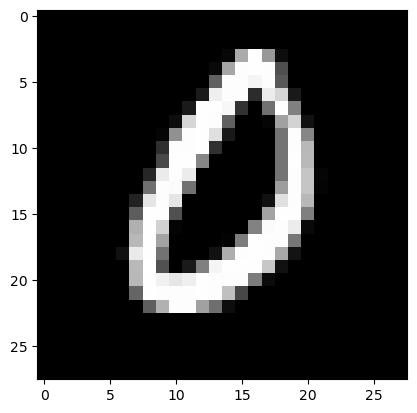

Prediction:  [5]
Label:  5


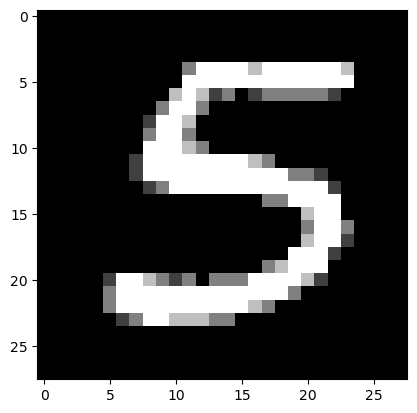

In [ ]:
test_prediction(0,W1,b1,W2,b2)
test_prediction(24,W1,b1,W2,b2)
test_prediction(8,W1,b1,W2,b2)
test_prediction(33,W1,b1,W2,b2)